#### Effect of pooling samples on the efficiency of comparative studies using microarrays
https://academic.oup.com/bioinformatics/article/21/24/4378/180078
#### Baseed on https://www.curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/

In [86]:
y

0        0.000000
1        0.000000
2       25.963625
3       30.046482
4       22.656896
5       28.503966
6       24.173561
7       21.838806
8        0.000000
9       23.590123
10      25.426944
11      21.485765
12      24.268495
13       0.000000
14       0.000000
15      27.510583
16      22.787339
17      21.509542
18       0.000000
19      24.246700
20      22.354232
21      24.265708
22      25.596421
23       0.000000
24      27.645333
25      24.017248
26      24.374247
27      25.410929
28      27.803597
29      22.782648
          ...    
3429    23.807447
3430    23.547456
3431    23.257675
3432     0.000000
3433    27.320877
3434    24.826435
3435    23.264420
3436     0.000000
3437     0.000000
3438    23.151697
3439     0.000000
3440     0.000000
3441    22.125467
3442    21.508865
3443    20.223645
3444     0.000000
3445    23.897722
3446     0.000000
3447    26.486664
3448    19.836582
3449    22.964463
3450    23.119131
3451     0.000000
3452    23.467124
3453     0

In [1]:
!python3 -m pip install pandas --user --upgrade setuptools
!python3 -m pip install --upgrade pip --user
!python3 -m pip install gdown --user
!python3 -m pip install pandas --user
!python3 -m pip install tensorflow --user
#!python3 -m pip install tensorflow-gpu --user
!python3 -m pip install seaborn --user
!python3 -m pip install sklearn --user

Requirement already up-to-date: pandas in /home/animeshs/.local/lib/python3.5/site-packages (0.24.2)
Requirement already up-to-date: setuptools in /home/animeshs/.local/lib/python3.5/site-packages (45.3.0)
Requirement already up-to-date: pip in /home/animeshs/.local/lib/python3.5/site-packages (20.0.2)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 8, 6
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#### Effect of pooling samples on the efficiency of comparative studies using microarrays
https://academic.oup.com/bioinformatics/article/21/24/4378/180078


In [10]:
#!gdown --id 1aRXGcJlIkuC6uj1iLqzi9DQQS-3GPwM_ --output airbnb_nyc.csv
#!wget https://raw.githubusercontent.com/lanagarmire/deepimpute/master/examples/test.csv  -O na.csv
from pathlib import Path
inpD = Path.home()
print(inpD)
inpF="proteinGroups.txt"
inpF=inpD/"promec/promec/HF/Lars/2019/november/siri_marit/combined/txt"/inpF
Path.exists(inpF)

/home/animeshs


True

In [11]:
df = pd.read_csv(inpF,sep='\t')
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions
0,A0A024QZ33;Q9H0G5,A0A024QZ33;Q9H0G5,1;1,1;1,1;1,Nuclear speckle splicing regulatory protein 1,CCDC55;NSRP1,tr|A0A024QZ33|A0A024QZ33_HUMAN Coiled-coil dom...,2,1,...,13453,True,14901,207796;207797;207798;207799;207800;207801;2078...,120454;120455;120456;120457;120458;120459;120460,120460,NaN,NaN,NaN,NaN
1,A0A1B0GWH8;Q9UBD8;A0A1B0GWD3;A0A0A0MRC7;A0A1B0...,A0A1B0GWH8;Q9UBD8;A0A1B0GWD3;A0A0A0MRC7;A0A1B0...,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1,Battenin,CLN3,tr|A0A1B0GWH8|A0A1B0GWH8_HUMAN Battenin OS=Hom...,24,1,...,5554,True,6042,84329;84330;84331;84332;84333,48862;48863;48864,48864,NaN,NaN,NaN,NaN
2,A0A024QZP7;P06493;P06493-2;E5RIU6;A0A087WZZ9;K...,A0A024QZP7;P06493;P06493-2;E5RIU6;A0A087WZZ9,6;6;5;4;4;2;2,6;6;5;4;4;2;2,4;4;4;2;2;0;0,Cyclin-dependent kinase 1,CDC2;CDK1,tr|A0A024QZP7|A0A024QZP7_HUMAN Cell division c...,7,6,...,7836;8606;9791;10245;12281;13237,True;True;True;True;True;True,8495;9344;10641;11131;13329;14648,118313;118314;118315;118316;118317;118318;1183...,68161;75415;75416;75417;75418;75419;75420;7542...,68161;75415;86983;90672;109727;118304,NaN,NaN,NaN,NaN
3,A0A024R4E5;Q00341;Q00341-2;H0Y394;C9JIZ1;H7C0A...,A0A024R4E5;Q00341;Q00341-2;H0Y394,45;44;40;31;12;11;11;10;9;9;9;8;8;6;6;5;5;5;4;...,45;44;40;31;12;11;11;10;9;9;9;8;8;6;6;5;5;5;4;...,45;44;40;31;12;11;11;10;9;9;9;8;8;6;6;5;5;5;4;...,Vigilin,HDLBP,tr|A0A024R4E5|A0A024R4E5_HUMAN High density li...,22,45,...,91;779;1606;1985;2559;2690;2900;2938;3134;3641...,True;True;True;True;True;True;True;True;True;T...,98;848;1781;2178;2800;2940;3168;3207;3423;3424...,1261;1262;1263;1264;1265;1266;1267;1268;1269;1...,803;804;805;806;807;808;809;810;811;812;813;81...,804;6886;14203;17586;22540;23678;25667;26064;2...,0;1;2;3,0;1;2;3,30;621;623;927,92;573;805;1127
4,A0A087WZA9;A0A024R4K9;A0A087X266;Q9BXJ8-2;Q9BXJ8,A0A087WZA9;A0A024R4K9;A0A087X266;Q9BXJ8-2;Q9BXJ8,1;1;1;1;1,1;1;1;1;1,1;1;1;1;1,Transmembrane protein 120A,TMEM120A;TMPIT,tr|A0A087WZA9|A0A087WZA9_HUMAN Transmembrane p...,5,1,...,11526,True,12523,177057;177058;177059;177060;177061;177062;1770...,103277;103278;103279;103280;103281;103282;103283,103277,NaN,NaN,NaN,NaN


# Exploration

In [12]:
df.shape

(3459, 164)

In [13]:
df.columns

Index(['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)',
       'Peptide counts (razor+unique)', 'Peptide counts (unique)',
       'Protein names', 'Gene names', 'Fasta headers', 'Number of proteins',
       'Peptides',
       ...
       'Peptide IDs', 'Peptide is razor', 'Mod. peptide IDs', 'Evidence IDs',
       'MS/MS IDs', 'Best MS/MS', 'Deamidation (NQ) site IDs',
       'Oxidation (M) site IDs', 'Deamidation (NQ) site positions',
       'Oxidation (M) site positions'],
      dtype='object', length=164)

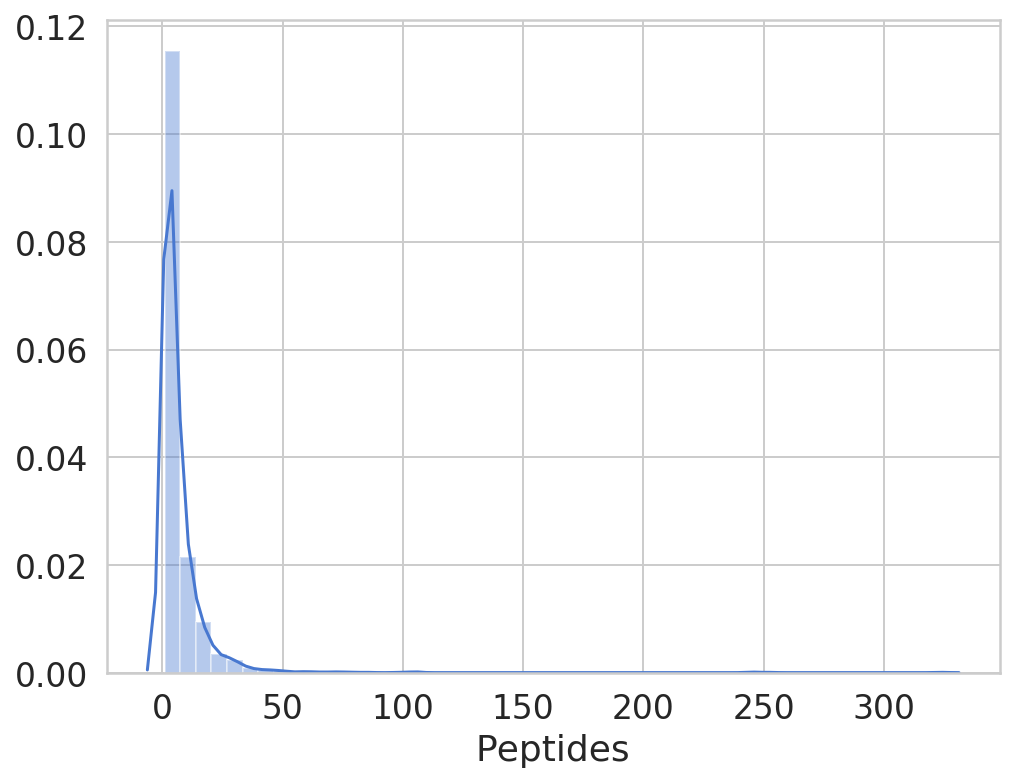

In [15]:
sns.distplot(df.Peptides);

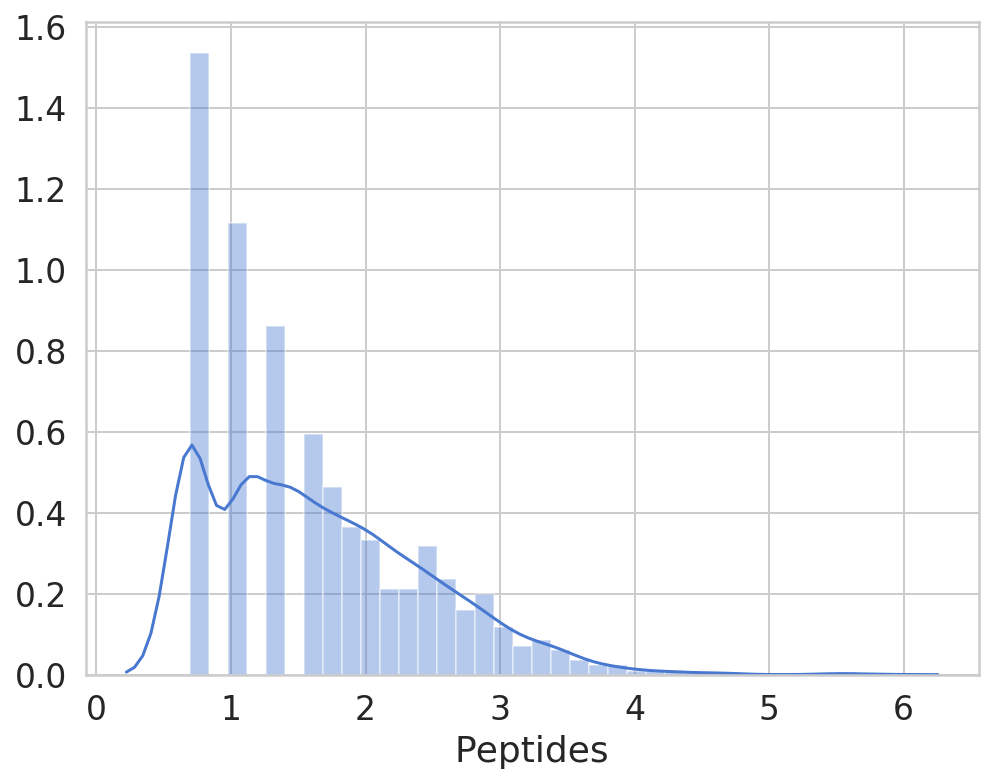

In [16]:
sns.distplot(np.log1p(df.Peptides));

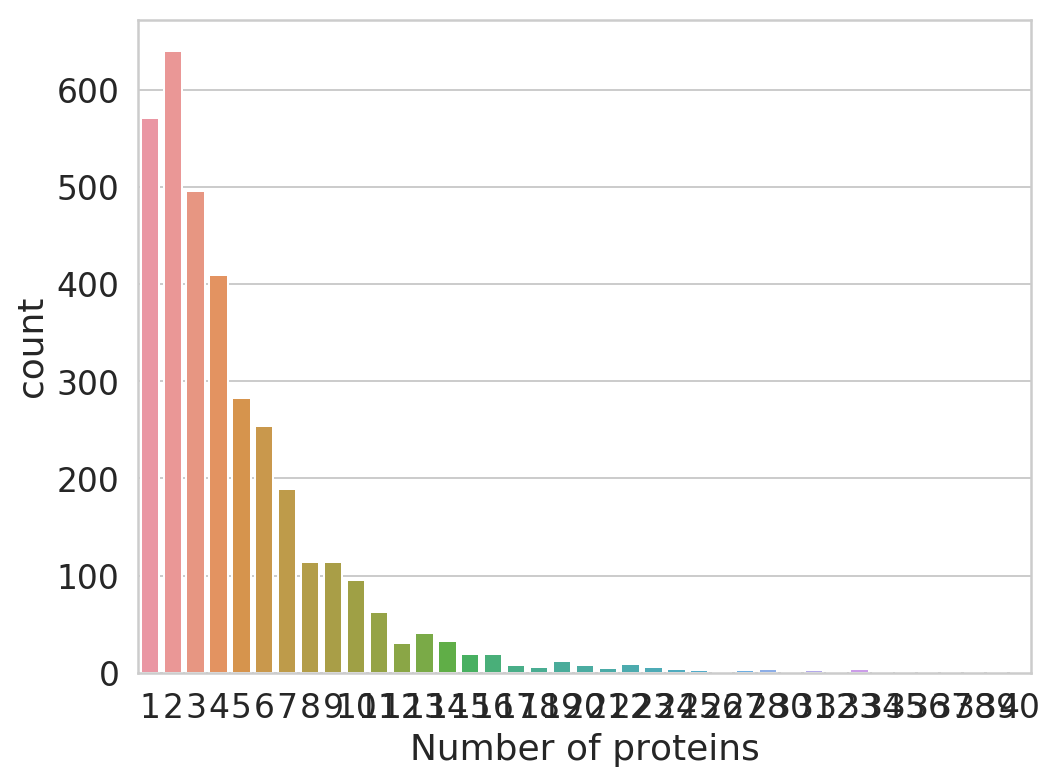

In [21]:
sns.countplot(x='Number of proteins', data=df);

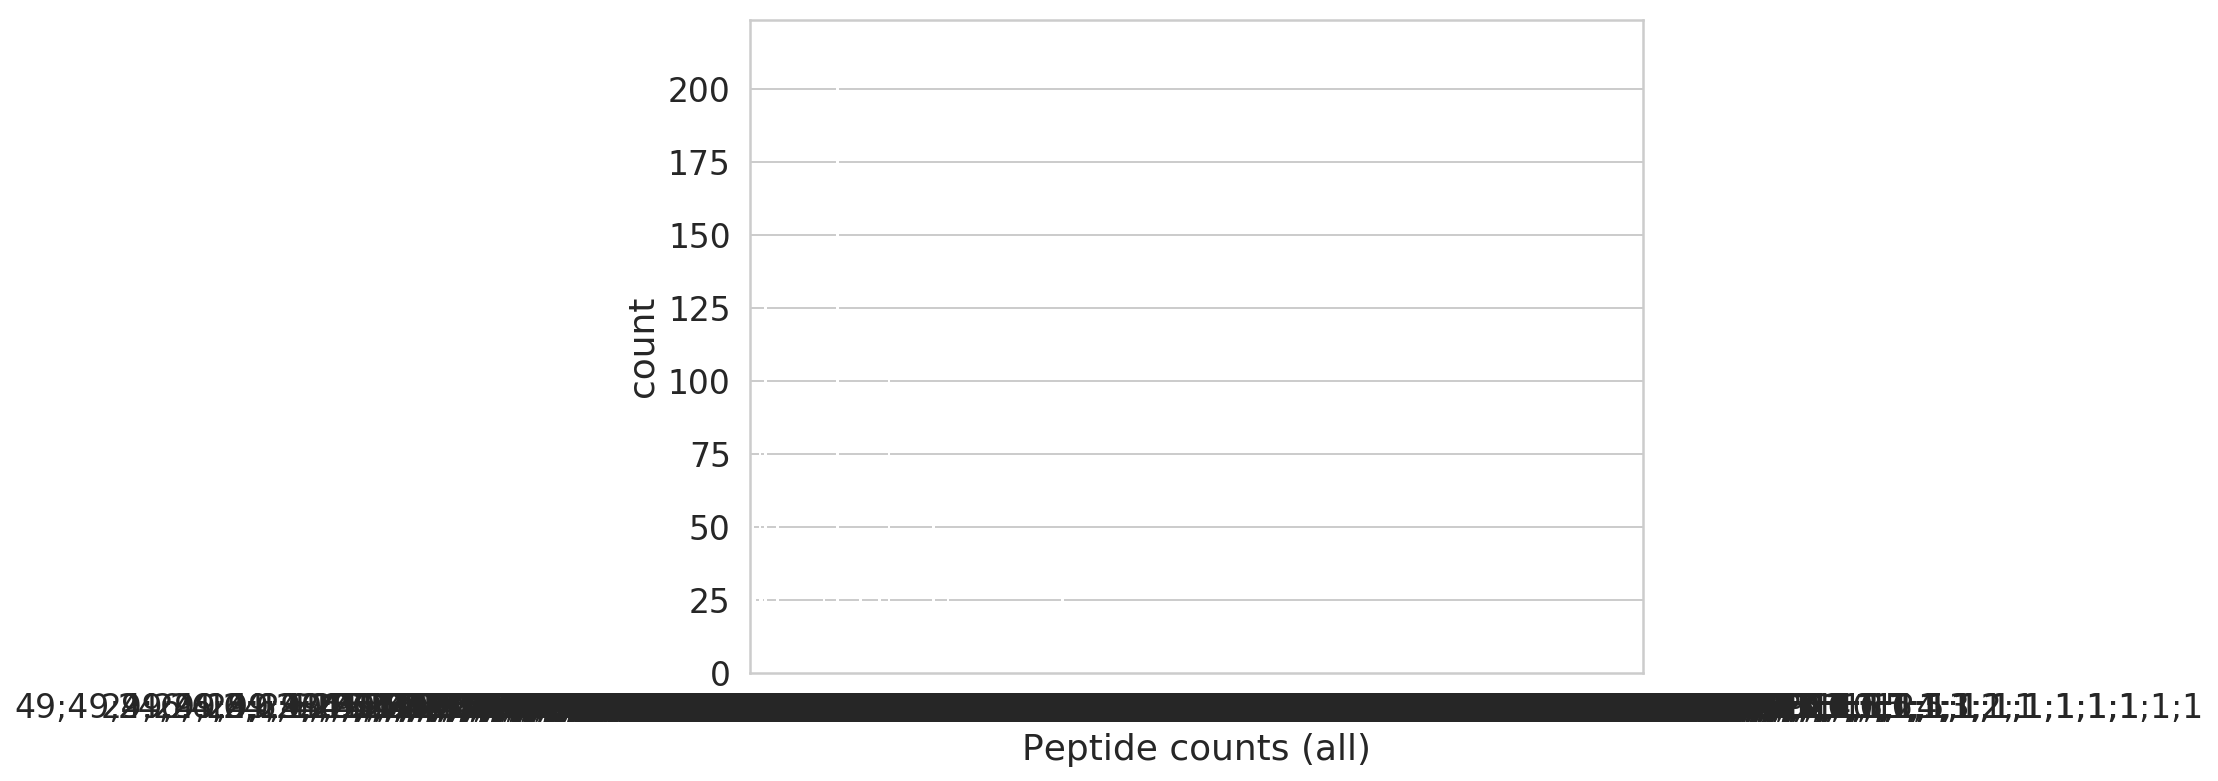

In [22]:
sns.countplot(x='Peptide counts (all)', data=df);

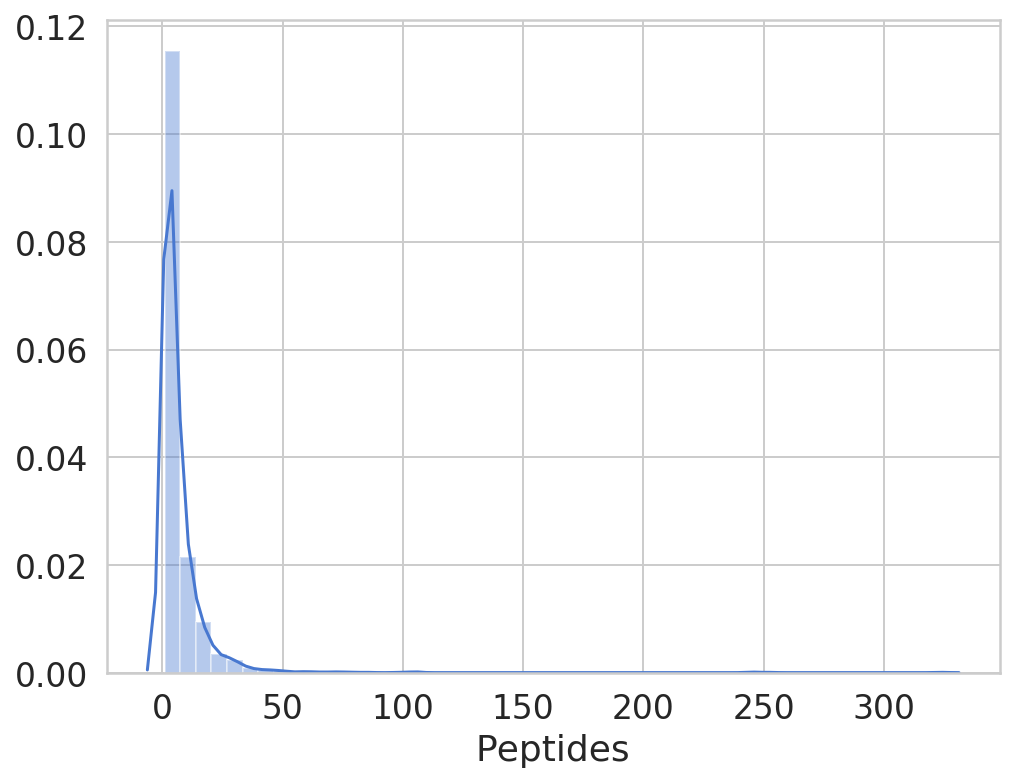

In [24]:
sns.distplot(df.Peptides);

In [25]:
corr_matrix = df.corr()

In [26]:
corr_matrix

,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides 1_TK9_ctr1,Peptides 10_TK9_combi_1,Peptides 11_TK9_combi_2,Peptides 12_TK9_combi_3,Peptides 13_TK9_ctr_poolet,Peptides 14_TK9_apim_poolet,...,MS/MS count 2_TK9_ctr2,MS/MS count 3_TK9_ctr3,MS/MS count 4_TK9_apim1,MS/MS count 5_TK9_apim_2,MS/MS count 6_TK9_apim_3,MS/MS count 7_TK9_mel_1,MS/MS count 8_TK9_mel_2,MS/MS count 9_TK9_mel_3,MS/MS count,id
Number of proteins,1.000000,0.182047,0.219348,0.209540,0.178525,0.176885,0.173760,0.170182,0.171259,0.170328,...,0.208637,0.183234,0.208302,0.195779,0.167477,0.200942,0.197917,0.203578,0.199221,-0.243179
Peptides,0.182047,1.000000,0.847214,0.736268,0.992391,0.991758,0.995338,0.989392,0.983521,0.989193,...,0.766566,0.764899,0.763726,0.783286,0.779823,0.783847,0.784027,0.776825,0.789621,0.043142
Razor + unique peptides,0.219348,0.847214,1.000000,0.873490,0.836351,0.836630,0.838888,0.830058,0.809269,0.832535,...,0.899485,0.895789,0.896655,0.919640,0.914842,0.922138,0.919254,0.911052,0.926835,0.048065
Unique peptides,0.209540,0.736268,0.873490,1.000000,0.725528,0.725793,0.725937,0.719763,0.681012,0.718533,...,0.783677,0.744397,0.778005,0.791784,0.760469,0.787526,0.782002,0.757765,0.785028,0.048241
Peptides 1_TK9_ctr1,0.178525,0.992391,0.836351,0.725528,1.000000,0.991850,0.991090,0.988427,0.984309,0.989716,...,0.781883,0.780908,0.778020,0.795803,0.791301,0.795618,0.796913,0.790024,0.802650,0.040004
Peptides 10_TK9_combi_1,0.176885,0.991758,0.836630,0.725793,0.991850,1.000000,0.992622,0.990091,0.985988,0.990444,...,0.778449,0.778835,0.777228,0.794316,0.790832,0.796609,0.798002,0.792703,0.802430,0.040106
Peptides 11_TK9_combi_2,0.173760,0.995338,0.838888,0.725937,0.991090,0.992622,1.000000,0.989987,0.984034,0.989554,...,0.771594,0.769394,0.769178,0.789576,0.784460,0.790367,0.790378,0.784166,0.795569,0.042464
Peptides 12_TK9_combi_3,0.170182,0.989392,0.830058,0.719763,0.988427,0.990091,0.989987,1.000000,0.982459,0.988810,...,0.767274,0.773052,0.764218,0.785190,0.784991,0.785291,0.788442,0.784037,0.793236,0.043167
Peptides 13_TK9_ctr_poolet,0.171259,0.983521,0.809269,0.681012,0.984309,0.985988,0.984034,0.982459,1.000000,0.987619,...,0.759230,0.770111,0.758752,0.777597,0.777198,0.776546,0.778804,0.775260,0.786317,0.037284
Peptides 14_TK9_apim_poolet,0.170328,0.989193,0.832535,0.718533,0.989716,0.990444,0.989554,0.988810,0.987619,1.000000,...,0.777785,0.780741,0.774517,0.794002,0.795509,0.793821,0.795491,0.790281,0.803039,0.040246


In [27]:
corrPeptides = corr_matrix['Peptides']
corrPeptides.iloc[corrPeptides.abs().argsort()]

Q-value                                       -0.032375
id                                             0.043142
Number of proteins                             0.182047
Unique sequence coverage [%]                   0.282188
LFQ intensity 12_TK9_combi_3                   0.302046
Intensity 12_TK9_combi_3                       0.306376
Intensity 10_TK9_combi_1                       0.312558
LFQ intensity 10_TK9_combi_1                   0.315255
Intensity 8_TK9_mel_2                          0.319221
Intensity 9_TK9_mel_3                          0.319831
Intensity 13_TK9_ctr_poolet                    0.320529
LFQ intensity 8_TK9_mel_2                      0.324143
LFQ intensity 3_TK9_ctr3                       0.329410
LFQ intensity 9_TK9_mel_3                      0.337131
Intensity 7_TK9_mel_1                          0.340880
LFQ intensity 11_TK9_combi_2                   0.341410
LFQ intensity 4_TK9_apim1                      0.342267
LFQ intensity 7_TK9_mel_1                      0

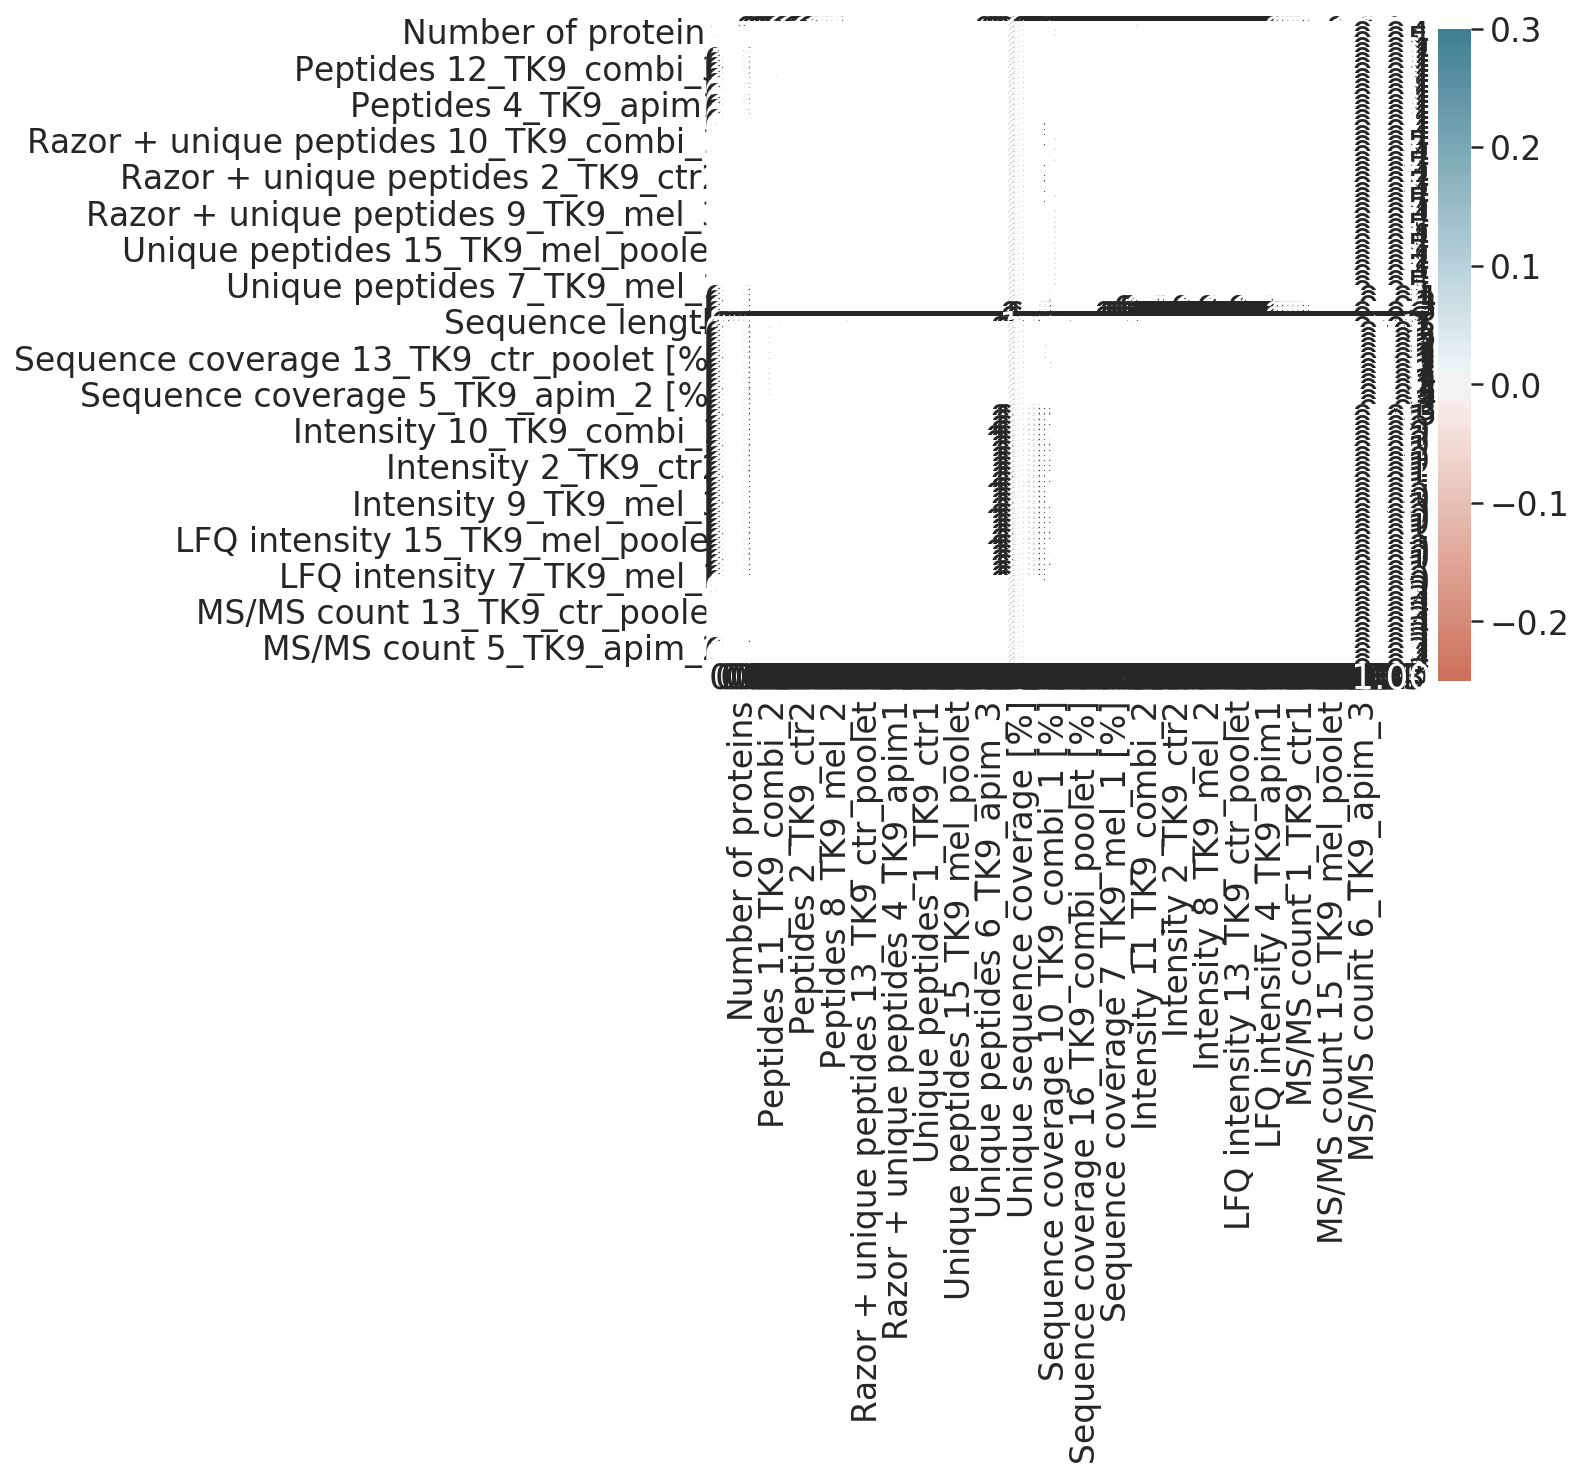

In [29]:
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,square=True, linewidths=.5);

# Preprocessing




## Missing data?

In [30]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Reverse                                    3408
Potential contaminant                      3405
Only identified by site                    3344
Deamidation (NQ) site positions            2932
Deamidation (NQ) site IDs                  2932
Oxidation (M) site positions               2548
Oxidation (M) site IDs                     2548
Identification type 13_TK9_ctr_poolet       537
Identification type 3_TK9_ctr3              466
Identification type 15_TK9_mel_poolet       437
Identification type 12_TK9_combi_3          373
Identification type 6_TK9_apim_3            372
Identification type 14_TK9_apim_poolet      360
Identification type 9_TK9_mel_3             336
Identification type 10_TK9_combi_1          333
Identification type 5_TK9_apim_2            321
Identification type 8_TK9_mel_2             284
Identification type 4_TK9_apim1             270
Identification type 11_TK9_combi_2          263
Identification type 1_TK9_ctr1              262
Identification type 16_TK9_combi_poolet 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ed9ff6160>,
      dtype=object)

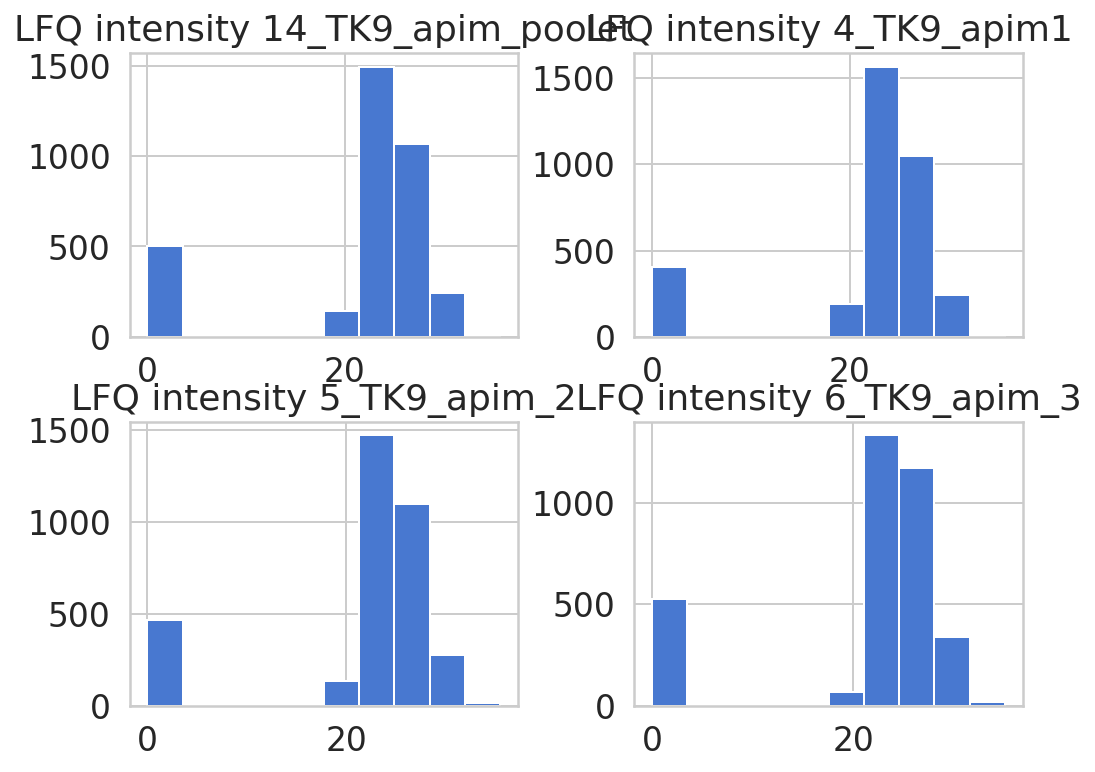

In [42]:
import numpy as np
dfLFQ=df.loc[:, df.columns.str.startswith('LFQ')&df.columns.str.contains('pim')]
#df['Ratio H/L normalized 161205_1_19913'].apply(np.log2).hist()
dfLFQ=(dfLFQ+1).apply(np.log2)
dfLFQ.hist()

In [48]:
missing = (dfLFQ==0).sum()
missing[missing > 0].sort_values(ascending=False)

LFQ intensity 6_TK9_apim_3          527
LFQ intensity 14_TK9_apim_poolet    502
LFQ intensity 5_TK9_apim_2          466
LFQ intensity 4_TK9_apim1           404
dtype: int64

## Remove unused columns!


In [26]:
#df = df.drop(['id', 'name', 'host_id', 'host_name', 'reviews_per_month', 'last_review', 'neighbourhood'], axis=1)

In [43]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [51]:
dfLFQ.columns

Index(['LFQ intensity 14_TK9_apim_poolet', 'LFQ intensity 4_TK9_apim1',
       'LFQ intensity 5_TK9_apim_2', 'LFQ intensity 6_TK9_apim_3'],
      dtype='object')

In [52]:
dfLFQ.head()

,LFQ intensity 14_TK9_apim_poolet,LFQ intensity 4_TK9_apim1,LFQ intensity 5_TK9_apim_2,LFQ intensity 6_TK9_apim_3
0,0.000000,21.943673,0.000000,22.097802
1,0.000000,22.011510,0.000000,0.000000
2,25.963625,25.655291,25.643779,26.041848
3,30.046482,30.163989,30.422419,30.069200
4,22.656896,0.000000,0.000000,0.000000


## Predict log2LFQ

In [65]:
X = dfLFQ[dfLFQ.columns[-3:]]#'LFQ intensity 14_TK9_apim_poolet','LFQ intensity 14_TK9_apim_poolet']
y = dfLFQ['LFQ intensity 14_TK9_apim_poolet']

In [66]:
X

,LFQ intensity 4_TK9_apim1,LFQ intensity 5_TK9_apim_2,LFQ intensity 6_TK9_apim_3
0,21.943673,0.000000,22.097802
1,22.011510,0.000000,0.000000
2,25.655291,25.643779,26.041848
3,30.163989,30.422419,30.069200
4,0.000000,0.000000,0.000000
5,28.116493,27.594984,27.849537
6,24.742474,23.459265,22.934217
7,22.664142,22.620063,22.174872
8,22.847701,22.309303,0.000000
9,23.544393,23.554031,23.242578


## Feature scaling and One-hot encoding

In [67]:
from sklearn.preprocessing import OneHotEncoder

data = [['value'], ['NA']]

OneHotEncoder(sparse=False).fit_transform(data)

array([[0., 1.],
       [1., 0.]])

In [68]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(#(OneHotEncoder(handle_unknown="ignore"), ['neighbourhood_group', 'room_type']),
    (MinMaxScaler(), ['LFQ intensity 5_TK9_apim_2','LFQ intensity 6_TK9_apim_3'])
)

In [69]:
transformer.fit(X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['LFQ intensity 5_TK9_apim_2',
                                  'LFQ intensity 6_TK9_apim_3'])],
                  verbose=False)

In [70]:
X = transformer.transform(X)

## Split the training and test data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [72]:
X_train.shape

(2767, 2)

# Modeling

In [73]:
def plot_mse(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.plot(hist['epoch'], hist['mse'],
            label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val MSE')
  plt.legend()
  plt.show()

Train on 2213 samples, validate on 554 samples
Epoch 1/100
2213/2213 [==============================] - 0s 208us/sample - loss: 536.8396 - mse: 536.8395 - val_loss: 527.6162 - val_mse: 527.6161
Epoch 2/100
2213/2213 [==============================] - 0s 42us/sample - loss: 528.1743 - mse: 528.1743 - val_loss: 519.9176 - val_mse: 519.9176
Epoch 3/100
2213/2213 [==============================] - 0s 39us/sample - loss: 518.6911 - mse: 518.6911 - val_loss: 509.8887 - val_mse: 509.8886
Epoch 4/100
2213/2213 [==============================] - 0s 37us/sample - loss: 507.8030 - mse: 507.8030 - val_loss: 498.1423 - val_mse: 498.1423
Epoch 5/100
2213/2213 [==============================] - 0s 42us/sample - loss: 493.6875 - mse: 493.6874 - val_loss: 483.7989 - val_mse: 483.7990
Epoch 6/100
2213/2213 [==============================] - 0s 36us/sample - loss: 476.9637 - mse: 476.9638 - val_loss: 464.1543 - val_mse: 464.1543
Epoch 7/100
2213/2213 [==============================] - 0s 39us/sample - lo

2213/2213 [==============================] - 0s 36us/sample - loss: 79.0590 - mse: 79.0590 - val_loss: 47.8743 - val_mse: 47.8743
Epoch 58/100
2213/2213 [==============================] - 0s 38us/sample - loss: 78.5617 - mse: 78.5617 - val_loss: 47.7003 - val_mse: 47.7002
Epoch 59/100
2213/2213 [==============================] - 0s 38us/sample - loss: 78.5576 - mse: 78.5577 - val_loss: 48.2539 - val_mse: 48.2539
Epoch 60/100
2213/2213 [==============================] - 0s 43us/sample - loss: 77.1941 - mse: 77.1941 - val_loss: 48.2822 - val_mse: 48.2822
Epoch 61/100
2213/2213 [==============================] - 0s 36us/sample - loss: 77.6643 - mse: 77.6643 - val_loss: 47.6851 - val_mse: 47.6851


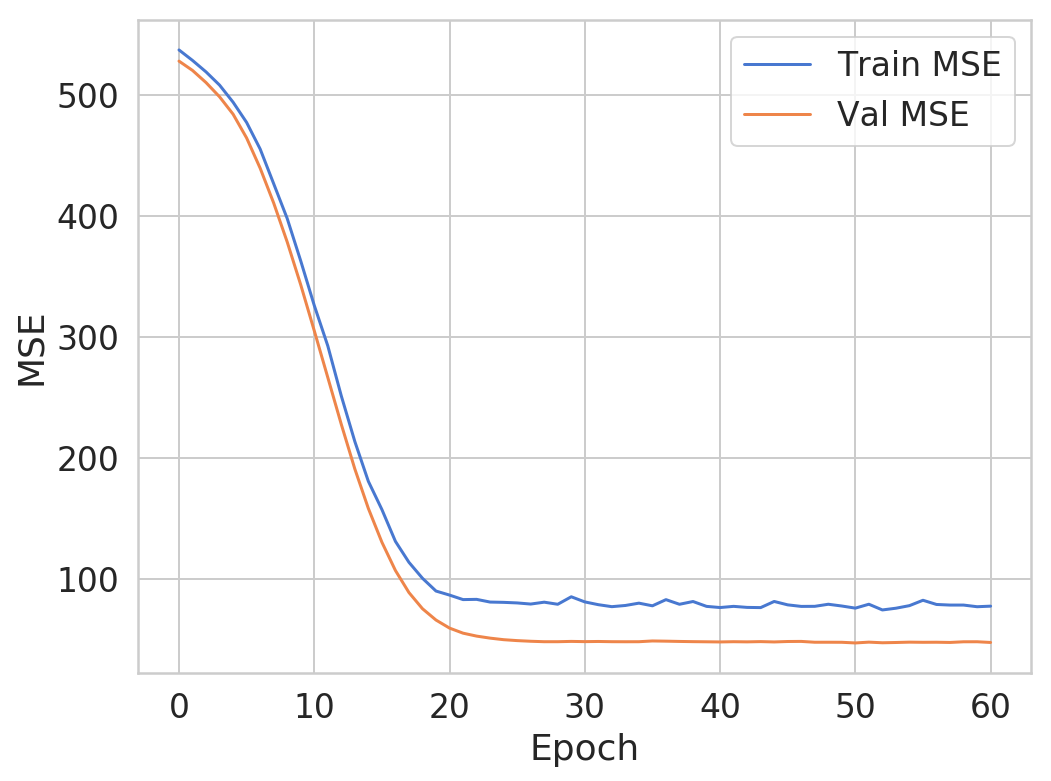

In [74]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=64, activation="relu", input_shape=[X_train.shape[1]]))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(1))

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mse', 
    metrics = ['mse'])

BATCH_SIZE = 32

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse',
  mode="min",
  patience=10
)

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

plot_mse(history)

# Evaluation

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [76]:
print(X_test.shape,y_test.shape)

(692, 2) (692,)


In [77]:
y_pred = model.predict(X_test)

In [78]:
print(mean_squared_error(y_test, y_pred))

42.952662590431885


In [79]:
print(mean_absolute_error(y_test, y_pred))

4.9074497528434895


In [80]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.553828086731593


In [81]:
print(r2_score(y_test, y_pred))

0.5223793153563624


# Saving

In [85]:
joblib.dump(transformer, "data_transformer.joblib")
model.save("missing_value_prediction_model.h5")